#### **Import libraries**

In [642]:
## Import libraries
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np


import warnings
warnings.filterwarnings('ignore')

### **Load the data**

In [643]:
## Load the data
kamis_df = pd.read_csv(r'C:\Users\Admin\DSA3020-VA-Capstone-Project\DATA\raw\kamis_maize_prices.csv')
agri_df = pd.read_csv(r'C:\Users\Admin\DSA3020-VA-Capstone-Project\DATA\raw\agribora_maize_prices.csv')

In [644]:
print(kamis_df.columns)
print(agri_df.columns)

Index(['Commodity_Classification', 'Commodity', 'Classification', 'County',
       'Market', 'Date', 'Year', 'Month', 'Year_Month', 'WeekofYear',
       'Year_Week', 'SupplyVolume', 'Retail', 'Wholesale', 'Unit'],
      dtype='object')
Index(['County', 'Date', 'WholeSale', 'Commodity_Classification', 'Year_Week',
       'WeekofYear'],
      dtype='object')


In [645]:

print(kamis_df.head())

  Commodity_Classification  Commodity Classification   County  \
0          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
1          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
2          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
3          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
4          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   

            Market       Date  Year  Month Year_Month  WeekofYear Year_Week  \
0   Marigat_Market  5/24/2021  2021      5    2021-05          21   2021-21   
1  Kabarnet_Market  5/24/2021  2021      5    2021-05          21   2021-21   
2  Kabarnet_Market  5/24/2021  2021      5    2021-05          21   2021-21   
3   Marigat_Market  5/24/2021  2021      5    2021-05          21   2021-21   
4   Marigat_Market  5/24/2021  2021      5    2021-05          21   2021-21   

   SupplyVolume  Retail  Wholesale Unit  
0       14000.0    30.0      27.00   Kg  
1        2000.0    40.0      22.22   Kg  
2       

In [646]:
agri_df.head()

,County,Date,WholeSale,Commodity_Classification,Year_Week,WeekofYear
0,Nairobi,2023-10-03,50.00,Dry_White_Maize,2023-40,40
1,Kirinyaga,2023-10-03,48.89,Dry_White_Maize,2023-40,40
2,Kisumu,2023-10-03,44.44,Dry_White_Maize,2023-40,40
3,Uasin-Gishu,2023-10-03,46.67,Dry_White_Maize,2023-40,40
4,Uasin-Gishu,2023-10-03,46.67,Dry_White_Maize,2023-40,40


In [647]:
print(kdf.columns)
print()

Index(['Commodity_Classification', 'Commodity', 'Classification', 'County',
       'Market', 'Date', 'Year', 'Month', 'Year_Month', 'WeekofYear',
       'Year_Week', 'SupplyVolume', 'Retail', 'Wholesale', 'Unit', 'price',
       'week'],
      dtype='object')



In [648]:
# Selecting all entries with White Maize
kdf = kamis_df[kamis_df['Commodity_Classification'].str.contains("White_Maize", na=False)].copy()

In [649]:
kdf.head(5)

,Commodity_Classification,Commodity,Classification,County,Market,Date,Year,Month,Year_Month,WeekofYear,Year_Week,SupplyVolume,Retail,Wholesale,Unit
0,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,5/24/2021,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg
1,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Kabarnet_Market,5/24/2021,2021,5,2021-05,21,2021-21,2000.0,40.0,22.22,Kg
2,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Kabarnet_Market,5/24/2021,2021,5,2021-05,21,2021-21,2700.0,30.0,25.00,Kg
3,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,5/24/2021,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg
4,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,5/24/2021,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg


#### **Dataset to just the white maize products**

In [650]:
## Selecting all entries in the agriBORA set with White Maize (all the data)
agri_df = agri_df[agri_df['Commodity_Classification'].str.contains("White_Maize", na=False)].copy()
agri_df.shape

(808, 6)

In [651]:
## The unique counties in the agriBORA dataset
agri_df.County.unique()

array(['Nairobi', 'Kirinyaga', 'Kisumu', 'Uasin-Gishu', 'Kiambu', 'Embu',
       'Nyeri', 'Mombasa', nan, 'Bungoma', 'Meru', 'Busia', 'Kakamega',
       'Nakuru', 'Machakos', 'Kajiado', 'Trans-Nzoia'], dtype=object)

In [652]:
## The unique counties in the KAMIS dataset
kdf.County.unique()

array(['Baringo', 'Bungoma', 'Busia', 'Elgeyo-Marakwet', 'Garissa',
       'Homa-Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu',
       'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Laikipia',
       'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa',
       'Nairobi', 'Nakuru', 'Nandi', 'Nyamira', 'Nyeri', 'Siaya',
       'Taita-Taveta', 'Tharaka-Nithi', 'Turkana', 'Uasin-Gishu',
       'Vihiga', 'West-Pokot', 'Bomet', 'Machakos', 'Muranga', 'Embu',
       'Trans-Nzoia', 'Samburu', 'Narok', 'Nyandarua', 'Tana-River',
       'Kwale', 'Lamu'], dtype=object)

In [653]:
## The counties of interest
target_counties = {"Kiambu","Kirinyaga","Mombasa","Nairobi","Uasin-Gishu"}

#### **Define Target Counties**

In [654]:
## Restricting myself to target counties
kdf = kdf[kdf['County'].isin(target_counties)]
agri_df = agri_df[agri_df['County'].isin(target_counties)]

#### **Creating a unified price column in both datasets**

In [655]:
## Select the price columns (Wholesale)
kdf['price'] = pd.to_numeric(kdf['Wholesale'], errors='coerce')
agri_df['price'] = pd.to_numeric(agri_df['WholeSale'], errors='coerce')

##### **Convert Date to datetime object**

In [656]:
## Convert Date to datetime object
kdf['Date'] = pd.to_datetime(kdf['Date'])
agri_df['Date'] = pd.to_datetime(agri_df['Date'])

##### **Weekly alignment**

In [657]:
# Weekly alignment (use Monday as start of ISO week)
agri_df["week"] = agri_df["Date"].dt.to_period("W").apply(lambda p: p.start_time)
kdf["week"] = kdf["Date"].dt.to_period("W").apply(lambda p: p.start_time)

In [658]:
agri_df.head()

,County,Date,WholeSale,Commodity_Classification,Year_Week,WeekofYear,price,week
0,Nairobi,2023-10-03,50.00,Dry_White_Maize,2023-40,40,50.00,2023-10-02
1,Kirinyaga,2023-10-03,48.89,Dry_White_Maize,2023-40,40,48.89,2023-10-02
3,Uasin-Gishu,2023-10-03,46.67,Dry_White_Maize,2023-40,40,46.67,2023-10-02
4,Uasin-Gishu,2023-10-03,46.67,Dry_White_Maize,2023-40,40,46.67,2023-10-02
5,Nairobi,2023-10-04,50.00,Dry_White_Maize,2023-40,40,50.00,2023-10-02


##### **Weekly aggregated wholesale prices per county**

In [659]:
## Aggregate to Count-Week wholesale mean
kdf_week = (
    kdf.groupby(['County', 'week'], as_index=False)['price']
    .mean()
    .rename(columns={'price' : 'kamis_price'})
)

agri_df_week = (
    agri_df.groupby(['County', 'week'], as_index=False)['price']
    .mean()
    .rename(columns={'price': 'agri_price'})
)

In [660]:
kdf_week.head()

,County,week,kamis_price
0,Kiambu,2021-05-24,29.951304
1,Kiambu,2021-06-07,30.560000
2,Kiambu,2021-06-14,30.560000
3,Kiambu,2021-07-19,31.110000
4,Kiambu,2021-07-26,31.110000


In [661]:
agri_df_week.head()

,County,week,agri_price
0,Kiambu,2023-10-02,46.67
1,Kiambu,2024-01-15,47.78
2,Kiambu,2024-02-05,47.78
3,Kiambu,2024-02-12,44.44
4,Kiambu,2024-03-04,37.78


##### **Summary of data coverage per county and dataset**

In [662]:
## How many weeks of data is covered in each table ?

coverage_agr = (agri_df_week.groupby("County")["week"]
           .agg(min_date="min", max_date="max", weeks="nunique")
           .reset_index())
coverage_agr["dataset"] = "agribora"

coverage_kam = (kdf_week.groupby("County")["week"]
           .agg(min_date="min", max_date="max", weeks="nunique")
           .reset_index())
coverage_kam["dataset"] = "kamis"

##### **Combine them**

In [663]:
coverage = pd.concat([coverage_agr, coverage_kam], ignore_index=True)

In [664]:
coverage.head()

,County,min_date,max_date,weeks,dataset
0,Kiambu,2023-10-02,2025-10-06,30,agribora
1,Kirinyaga,2023-10-02,2025-08-04,25,agribora
2,Mombasa,2024-02-05,2025-08-11,17,agribora
3,Nairobi,2023-10-02,2025-10-06,56,agribora
4,Uasin-Gishu,2023-10-02,2025-10-06,74,agribora


##### **Pivot Table Creation**

In [665]:
pivot_cov = (
    coverage
    .pivot_table(
        index="County",      # Rows are counties
        columns="dataset",   # Columns are the dataset names
        values="weeks",      # Values to display
    )
    .fillna(0)              # Fill missing entries with 0
)
pivot_cov.head()

dataset,agribora,kamis
County,,
Kiambu,30.0,32.0
Kirinyaga,25.0,186.0
Mombasa,17.0,41.0
Nairobi,56.0,180.0
Uasin-Gishu,74.0,153.0


##### **Heatmap Visualization**

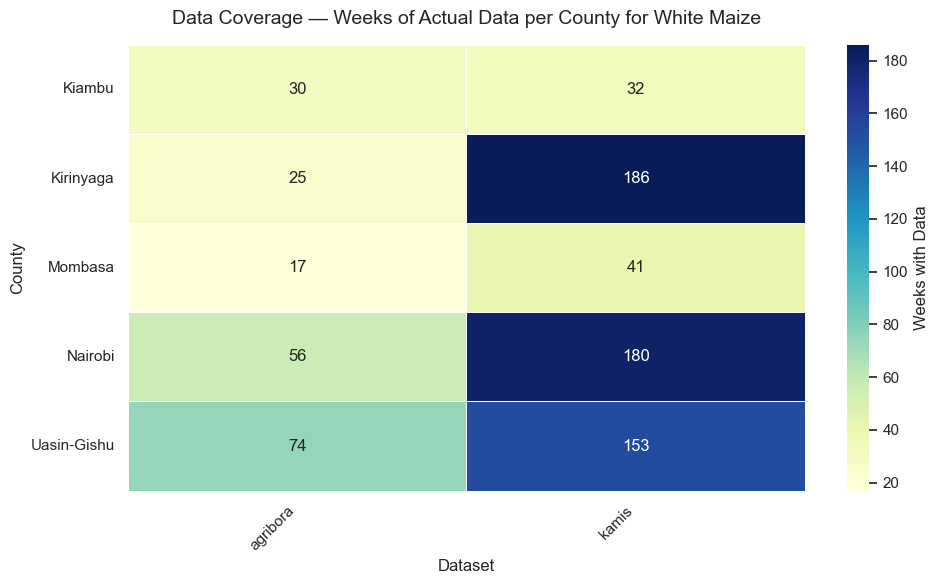

In [666]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_cov,
    annot=True,               # Show the actual numbers on the heatmap
    fmt=".0f",                # Integer format (no decimals)
    cmap="YlGnBu",            # Green-to-blue color map
    linewidths=0.5,
    cbar_kws={"label": "Weeks with Data"}  # Label for the color bar
)
plt.title("Data Coverage — Weeks of Actual Data per County for White Maize", fontsize=14, pad=15)
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("County", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate dataset names
plt.yticks(rotation=0)               # Keep county names horizontal
plt.tight_layout()
plt.show()


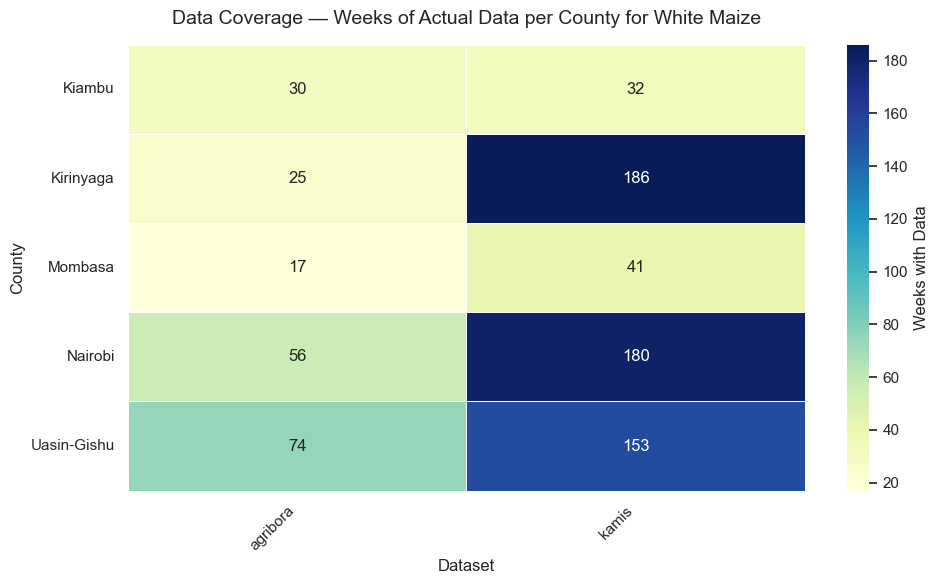

In [667]:
# --- Step 1️⃣: Create pivot table for visualization ---
pivot_cov = (
    coverage
    .pivot_table(
        index="County",
        columns="dataset",
        values="weeks",
    )
    .fillna(0)
)

# --- Step 2️⃣: Plot heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_cov,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Weeks with Data"}
)

plt.title("Data Coverage — Weeks of Actual Data per County for White Maize", fontsize=14, pad=15)
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("County", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##### **Compute average Retail per County per dataset**

In [668]:
# Average per County for Kamis
kamis_avg = kdf_week.groupby('County')['kamis_price'].mean().reset_index()
kamis_avg.rename(columns={'kamis_price':'Retail'}, inplace=True)
kamis_avg['dataset'] = 'kamis'

# Average per County for Agribora
agri_avg = agri_df_week.groupby('County')['agri_price'].mean().reset_index()
agri_avg.rename(columns={'agri_price':'Retail'}, inplace=True)
agri_avg['dataset'] = 'agribora'

# Combine both
coverage_retail = pd.concat([kamis_avg, agri_avg], ignore_index=True)
coverage_retail.head()


,County,Retail,dataset
0,Kiambu,44.067300,kamis
1,Kirinyaga,47.039283,kamis
2,Mombasa,57.922933,kamis
3,Nairobi,53.216412,kamis
4,Uasin-Gishu,51.209237,kamis


#### **Heatmap**


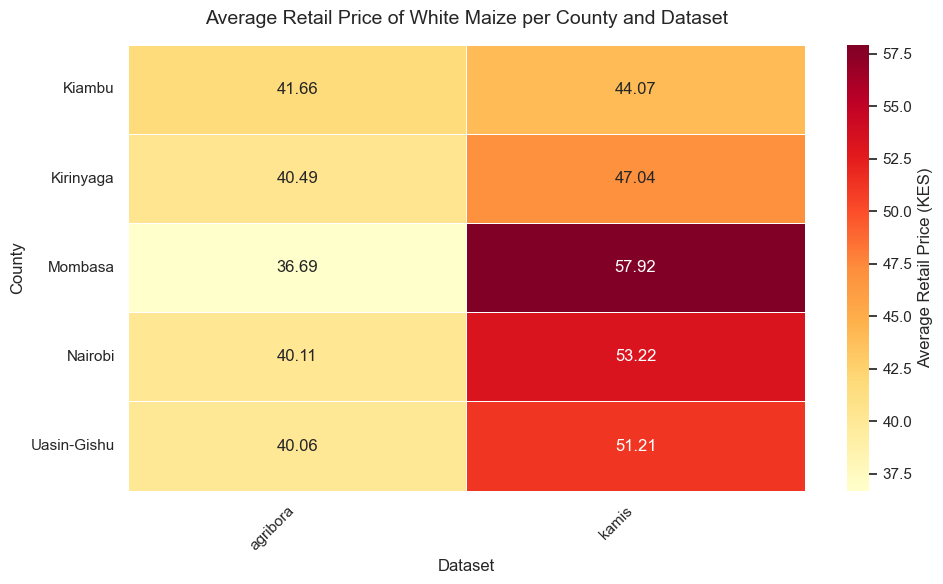

In [669]:
# --- Step 1️⃣: Create pivot table for average Retail price ---
pivot_retail = coverage_retail.pivot_table(
    index="County",
    columns="dataset",
    values="Retail",
    aggfunc="mean"
).fillna(0)  # fill missing values with 0

# --- Step 2️⃣: Plot heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_retail,
    annot=True,
    fmt=".2f",           
    cmap="YlOrRd",       
    linewidths=0.5,
    cbar_kws={"label": "Average Retail Price (KES)"}
)
plt.title("Average Retail Price of White Maize per County and Dataset", fontsize=14, pad=15)
plt.xlabel("Dataset", fontsize=12)
plt.ylabel("County", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [670]:
# Is there an overlap between kamis & agribora data ?
overlap = (
    agri_df_week.merge(kdf_week, on=['County', 'week'], how='inner')
    .sort_values(['County', 'week'])
)

In [671]:
overlap

,County,week,agri_price,kamis_price
0,Kirinyaga,2023-10-02,48.890000,43.776000
1,Kirinyaga,2023-10-16,45.560000,51.480000
2,Kirinyaga,2023-10-30,42.036667,45.901250
3,Kirinyaga,2023-11-06,42.500000,44.664000
4,Kirinyaga,2023-11-13,43.335000,42.960000
...,...,...,...,...
80,Uasin-Gishu,2024-09-23,33.330000,40.000000
81,Uasin-Gishu,2025-05-19,50.925000,45.000000
82,Uasin-Gishu,2025-05-26,52.220000,65.000000
83,Uasin-Gishu,2025-06-02,46.925000,61.666667


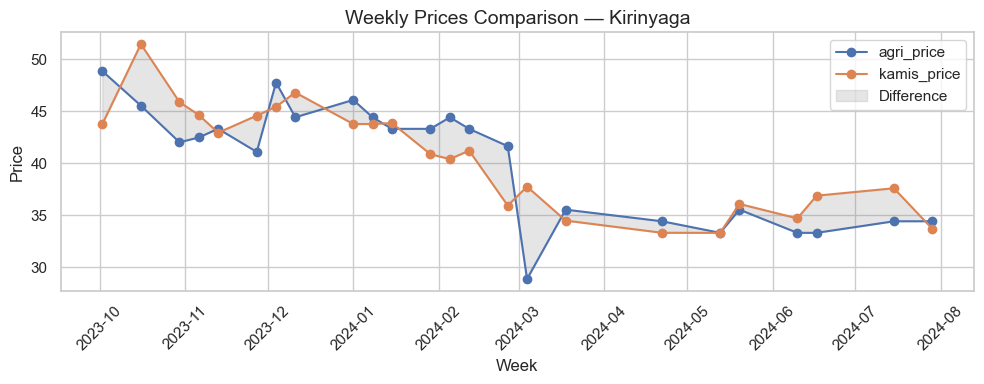

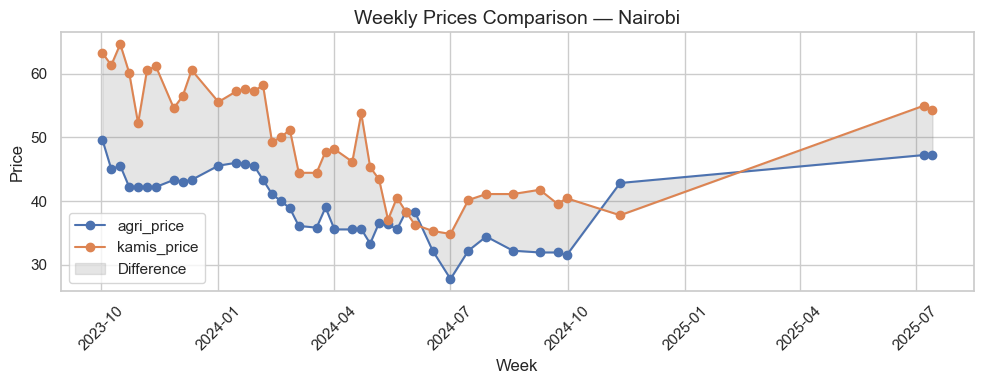

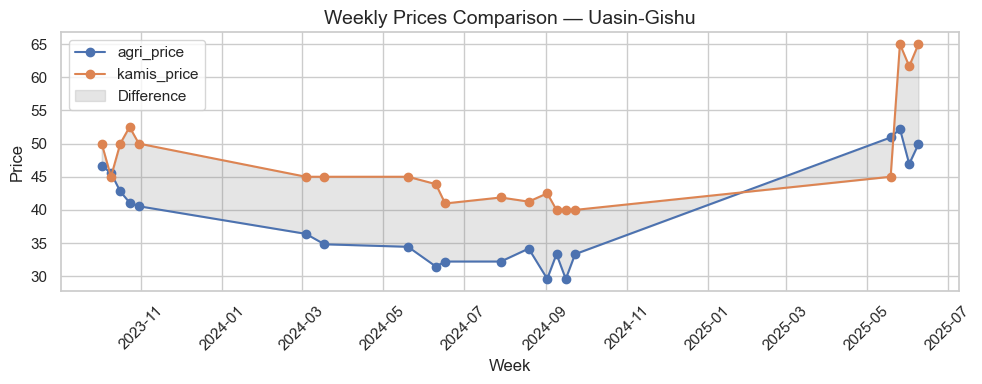

In [672]:
# Ensure 'week' is datetime or sortable
overlap['week'] = pd.to_datetime(overlap['week'])

# Set style
sns.set(style="whitegrid")

# List of counties
counties = overlap['County'].unique()

# Plot each county
for county in counties:
    df = overlap[overlap['County'] == county]

    plt.figure(figsize=(10, 4))

    # Plot agr_price and kamis_price
    plt.plot(df['week'], df['agri_price'], marker='o', label='agri_price')
    plt.plot(df['week'], df['kamis_price'], marker='o', label='kamis_price')

    # Shade the difference
    plt.fill_between(df['week'], df['agri_price'], df['kamis_price'],
                     color='gray', alpha=0.2, label='Difference')

    plt.title(f"Weekly Prices Comparison — {county}", fontsize=14)
    plt.xlabel("Week")
    plt.ylabel("Price")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [673]:
## Do some stats if the overlap is not empty
if not overlap.empty:
    overlap["diff"] = overlap["agri_price"] - overlap["kamis_price"]
    stats = overlap.groupby("County").agg(
        n=("agri_price","size"),
        corr=("agri_price", lambda x: np.corrcoef(x, overlap.loc[x.index,"kamis_price"])[0,1] if len(x)>2 else np.nan),
        mean_bias=("diff","mean"),
        mae=("diff", lambda x: np.abs(x).mean())
    ).reset_index().round(3)
else:
    stats = pd.DataFrame(columns=["county_norm","n","corr","mean_bias","mae"])

In [674]:
stats

,County,n,corr,mean_bias,mae
0,Kirinyaga,24,0.793,-0.333,2.662
1,Nairobi,41,0.809,-9.890,10.235
2,Uasin-Gishu,20,0.790,-8.570,9.218


In [675]:
agri_df_week.shape, kdf_week.shape

((202, 3), (592, 3))

### **Forecast idea**

- 1. Forecast using KAMIS only
- 2. Learn a mapping function: KAMIS -> AgriBORA
- 3. Apply the mapping to convert forecasts into AgriBORA space

- #### **Lag Features**

In [676]:
# Create lag features
kdf_week['lag1'] = kdf_week.groupby('County')['kamis_price'].shift(1)
kdf_week['lag2'] = kdf_week.groupby('County')['kamis_price'].shift(2)
kdf_week = kdf_week.dropna()
kdf_week = kdf_week.set_index('week')

In [677]:
kdf_week.columns

Index(['County', 'kamis_price', 'lag1', 'lag2'], dtype='object')

- ##### **Features & target**

In [678]:
# Define target
target = "kamis_price"
y = kdf_week[target]

# Define feature (lagged Retail)
X = kdf_week[["lag1","lag2"]]


- ##### **Trian/Test Split**

In [679]:
cutoff = int(len(X)*0.8)
X_train, y_train = X.iloc[:cutoff],y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:],y.iloc[cutoff:]

In [680]:
print(train_df.shape)
print(test_df.shape)

(452, 5)
(103, 5)


- ##### **Base Model**

In [681]:
# Baseline prediction: mean of y_train
y_pred_baseline = [y_train.mean()] * len(y_train)

# Compute MAE
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

# Print results
print("Mean Retail Reading (Train):", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))


Mean Retail Reading (Train): 48.93
Baseline MAE: 14.13


- ##### **Iteration**

- **Linear Regression Model**

In [682]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- **Prediction**

In [683]:
y_pred_test_lr = model_lr.predict(X_test)
y_pred_train_lr = model_lr.predict(X_train)
print(y_pred_test_lr[:5])
print(y_pred_train_lr[:5])



[42.37072894 36.40235449 35.73758038 38.23730267 39.89298788]
[31.38850436 31.55762017 31.93307374 32.08588195 32.08588195]


- **Evaluation**

In [684]:
training_mae=mean_absolute_error(y_train,y_pred_train_lr)
test_mae=mean_absolute_error(y_test,y_pred_test_lr)
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 3.12
Test MAE: 3.97


In [710]:
# R²
from sklearn.metrics import mean_absolute_error, r2_score
training_r2 = r2_score(y_train, y_pred_train_lr)
test_r2 = r2_score(y_test, y_pred_test_lr)



print("Training R²:", round(training_r2, 2))
print("Test R²:", round(test_r2, 2))

Training R²: 0.91
Test R²: 0.78


In [685]:
X_train.index

DatetimeIndex(['2021-06-14', '2021-07-19', '2021-07-26', '2021-08-02',
               '2021-08-09', '2021-08-23', '2021-08-30', '2021-09-06',
               '2021-09-13', '2021-09-20',
               ...
               '2022-01-10', '2022-01-17', '2022-01-24', '2022-01-31',
               '2022-02-07', '2022-02-14', '2022-02-21', '2022-02-28',
               '2022-03-07', '2022-03-14'],
              dtype='datetime64[ns]', name='week', length=444, freq=None)

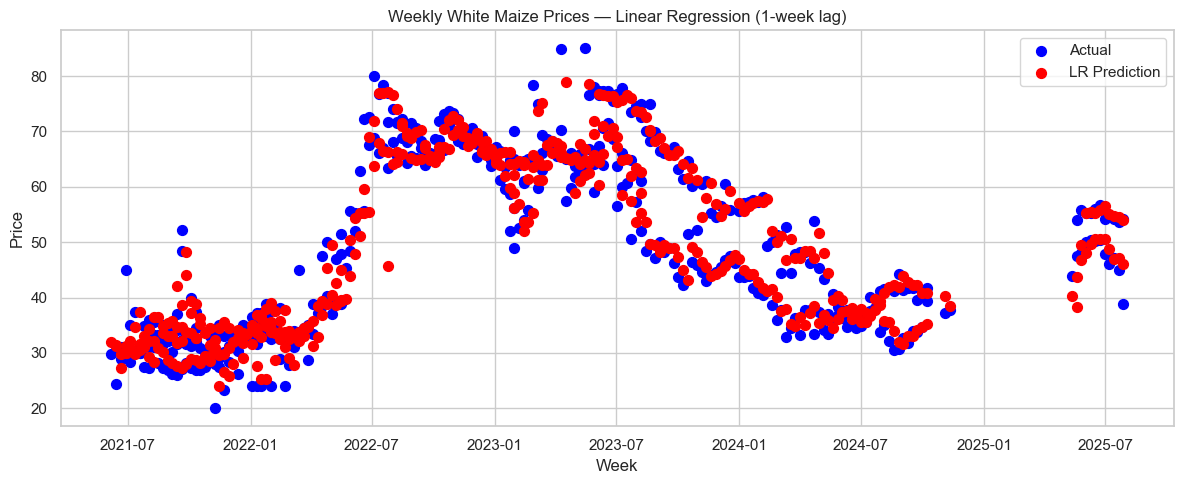

In [707]:
plt.figure(figsize=(12,5))

# Plot actual points
plt.scatter(X_train.index, y_train.values, color='blue', label='Actual', s=50)

# Plot predicted points
plt.scatter(X_train.index, y_pred_train_lr, color='red', label='LR Prediction', s=50)

plt.xlabel('Week')
plt.ylabel('Price')
plt.title('Weekly White Maize Prices — Linear Regression (1-week lag)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


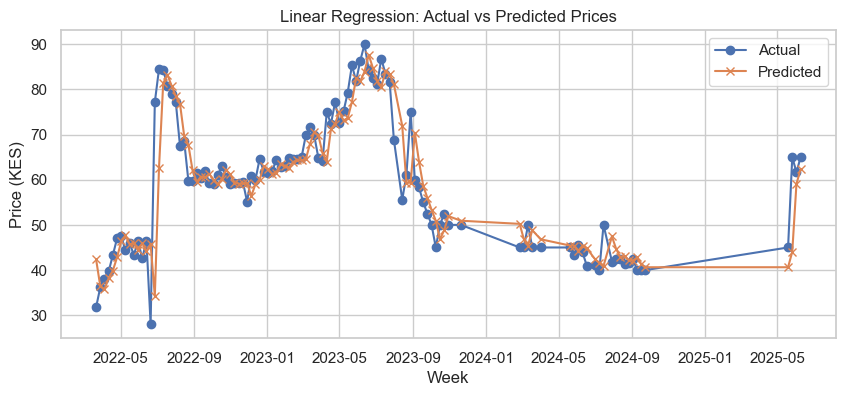

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(y_test.index,y_test.values, label='Actual', marker='o')
plt.plot(y_test.index,y_pred_test_lr, label='Predicted', marker='x')
plt.title("Linear Regression: Actual Test vs Predicted Prices Test")
plt.xlabel("Week")
plt.ylabel("Price (KES)")
plt.legend()
plt.show()


- **Communication**

In [731]:
# Extract intercept and coefficient
intercept = model_lr.intercept_
coefficient = model_lr.coef_[0]  # only one feature

# Print regression equation
print(f"Retail price = {intercept:.2f} + ({coefficient:.2f} * P.L1)")


Retail price = 2.21 + (0.68 * P.L1)


- **Random Forest Model**

In [689]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


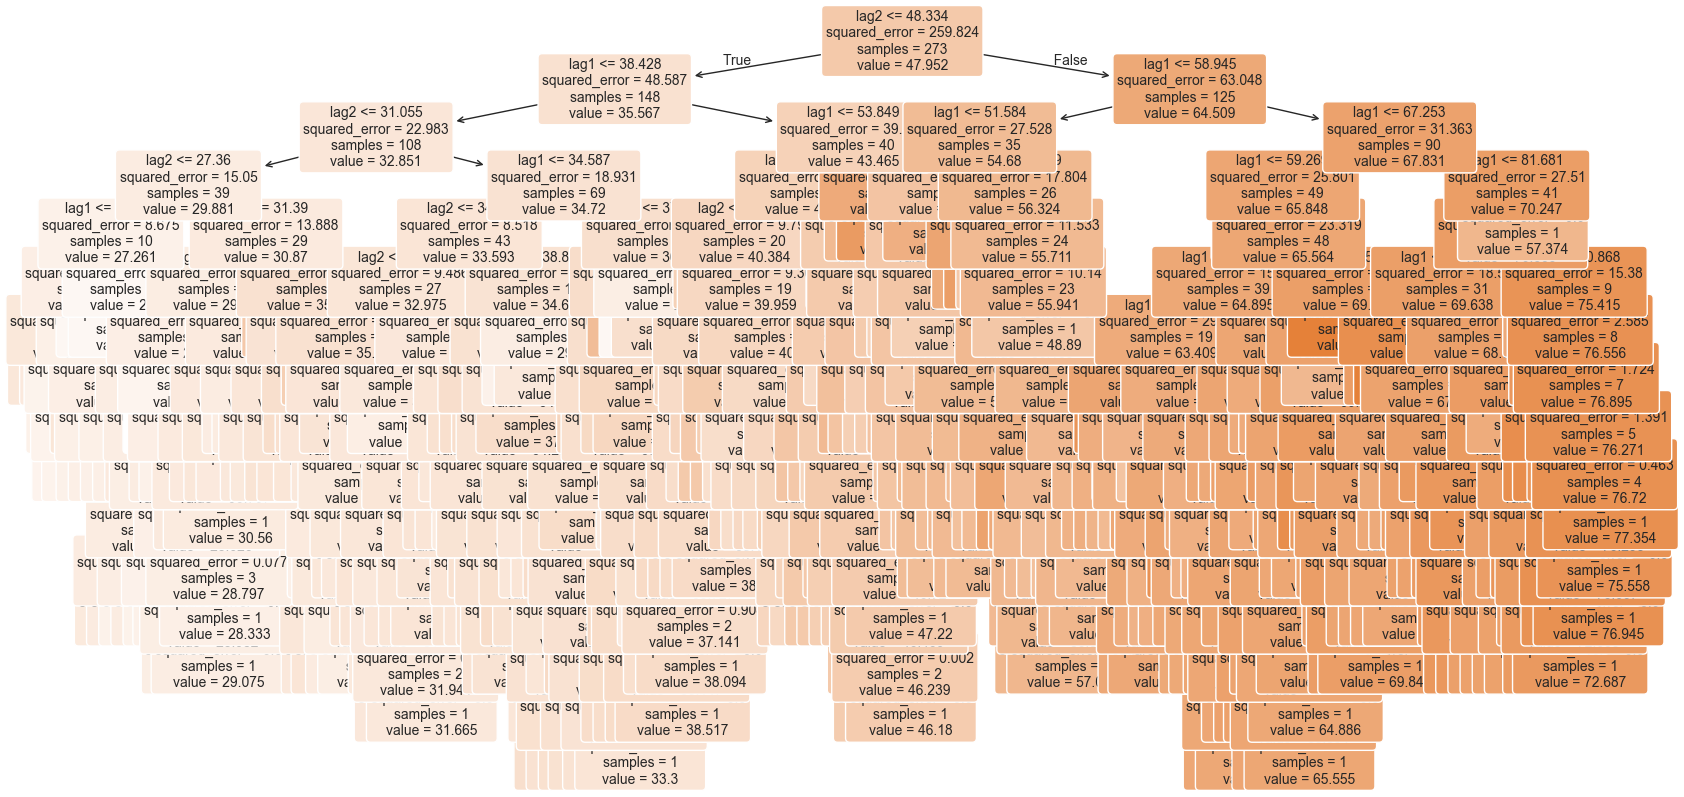

In [ ]:

# Pick the first tree in the forest
estimator = model_rf.estimators_[0]

plt.figure(figsize=(20,10))
tree.plot_tree(estimator, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.show()


  - **Prediction**

In [691]:
y_pred_test_fr = model_rf.predict(X_test)
y_pred_train_fr = model_rf.predict(X_train)
print(y_pred_test_fr[:5])
print(y_pred_train_fr[:5])



[36.77236342 31.87063464 34.66446667 34.837075   38.47413449]
[30.68014571 31.13827143 31.78421611 33.22743452 33.22743452]


- **Evaluation**

In [ ]:
training_mae=mean_absolute_error(y_train,y_pred_train_fr)
test_mae=mean_absolute_error(y_test,y_pred_test_fr)
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))


Training MAE: 1.37
Test MAE: 5.61


In [711]:
from sklearn.metrics import mean_absolute_error, r2_score
training_r2 = r2_score(y_train, y_pred_train_fr)
test_r2 = r2_score(y_test, y_pred_test_fr)



print("Training R²:", round(training_r2, 2))
print("Test R²:", round(test_r2, 2))

Training R²: 0.98
Test R²: 0.67


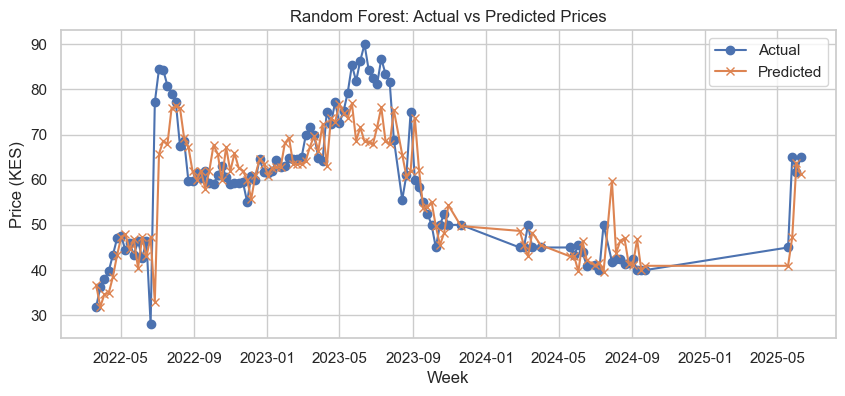

In [708]:
plt.figure(figsize=(10,4))
plt.plot(X_test.index,y_test.values, label='Actual', marker='o')
plt.plot(X_test.index,y_pred_test_fr, label='Predicted', marker='x')
plt.title("Random Forest: Actual vs Predicted Prices")
plt.xlabel("Week")
plt.ylabel("Price (KES)")
plt.legend()
plt.show()


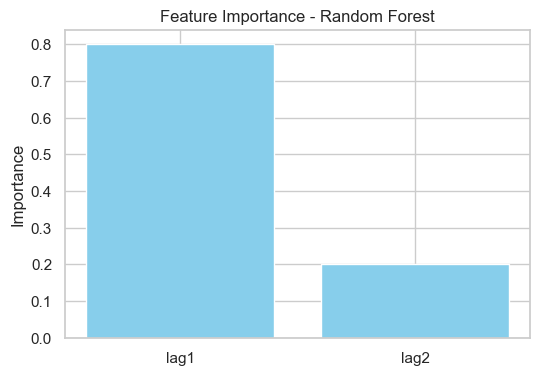

In [694]:
import pandas as pd
import matplotlib.pyplot as plt

# Suppose your features are lag1 and lag2
feature_names = X_train.columns
importances = model_rf.feature_importances_

# Create a DataFrame
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(6,4))
plt.bar(feat_imp['Feature'], feat_imp['Importance'], color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance")
plt.show()


#### **MAE by County**

In [712]:
import pandas as pd

def wrangle_predictions(kdf_week, y_pred_train_lr, y_pred_test_lr, y_pred_train_rf, y_pred_test_rf):
    """
    Add LR and Random Forest predictions to kdf_week DataFrame.
    
    Parameters:
        kdf_week (pd.DataFrame): Weekly data with 'County', 'week', and 'kamis_price'.
        y_pred_train_lr (array-like): LR predictions on training set.
        y_pred_test_lr (array-like): LR predictions on test set.
        y_pred_train_rf (array-like): RF predictions on training set.
        y_pred_test_rf (array-like): RF predictions on test set.
        
    Returns:
        pd.DataFrame: kdf_week with added 'pred_lr' and 'pred_fr' columns.
    """
    kdf_week = kdf_week.copy()
    
    # Combine LR predictions
    kdf_week['pred_lr'] = pd.concat([
        pd.Series(y_pred_train_lr, index=kdf_week.index[:len(y_pred_train_lr)]),
        pd.Series(y_pred_test_lr, index=kdf_week.index[len(y_pred_train_lr):len(y_pred_train_lr)+len(y_pred_test_lr)])
    ])
    
    # Combine RF predictions
    kdf_week['pred_fr'] = pd.concat([
        pd.Series(y_pred_train_rf, index=kdf_week.index[:len(y_pred_train_rf)]),
        pd.Series(y_pred_test_rf, index=kdf_week.index[len(y_pred_train_rf):len(y_pred_train_rf)+len(y_pred_test_rf)])
    ])
    
    return kdf_week


In [714]:
kdf_week = wrangle_predictions(
    kdf_week,
    y_pred_train_lr, y_pred_test_lr,
    y_pred_train_fr, y_pred_test_fr
)


In [728]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Filter for target counties
target_counties = ["Kiambu", "Kirinyaga", "Mombasa", "Nairobi", "Uasin-Gishu"]
df_filtered = kdf_week[kdf_week['County'].isin(target_counties)].reset_index()

# Create WeekNum and ID
df_filtered['WeekNum'] = df_filtered['week'].dt.isocalendar().week
df_filtered['ID'] = df_filtered['County'] + "_Week_" + df_filtered['WeekNum'].astype(str)

# Function to compute RMSE and MAE per ID
def compute_weekly_errors(df, pred_col):
    errors = []
    for id_val, group in df.groupby('ID'):
        y_true = group['kamis_price'].values
        y_pred = group[pred_col].values
        
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        
        errors.append({
            'ID': id_val,
            'Target_RMSE': round(rmse, 2),
            'Target_MAE': round(mae, 2)
        })
    return pd.DataFrame(errors)

# Calculate errors
errors_lr = compute_weekly_errors(df_filtered, 'pred_lr')
errors_rf = compute_weekly_errors(df_filtered, 'pred_fr')

# Merge LR and RF errors for comparison (optional)
errors_combined = errors_lr.merge(errors_rf, on='ID', suffixes=('_LR', '_RF'))

print(errors_combined.head(5))


               ID  Target_RMSE_LR  Target_MAE_LR  Target_RMSE_RF  \
0   Kiambu_Week_2            2.69           2.69            0.74   
1  Kiambu_Week_20            8.22           8.22            1.22   
2  Kiambu_Week_24            0.83           0.83            0.12   
3  Kiambu_Week_29            0.45           0.45            0.03   
4   Kiambu_Week_3            0.35           0.35            0.12   

   Target_MAE_RF  
0           0.74  
1           1.22  
2           0.12  
3           0.03  
4           0.12  


In [729]:
errors_combined.columns

Index(['ID', 'Target_RMSE_LR', 'Target_MAE_LR', 'Target_RMSE_RF',
       'Target_MAE_RF'],
      dtype='object')

In [730]:
# Select and rename columns
errors_final = errors_combined[['ID', 'Target_RMSE_LR', 'Target_MAE_LR']].copy()
errors_final = errors_final.rename(columns={
    'Target_RMSE_LR': 'Target_RMSE',
    'Target_MAE_LR': 'Target_MAE'
})

# Save to CSV
errors_final.to_csv(
    r'C:\Users\Admin\DSA3020-VA-Capstone-Project\DATA\submission\errors_final.csv',
    index=False
)


#### **Hyperparameter Tuning**

In [717]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best MAE:", -grid_search.best_score_)


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Best MAE: 3.386870455159117


In [734]:
# --- Initialize Random Forest with tuned parameters ---
model_rf_tune = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)

# --- Train ---
model_rf_tune.fit(X_train, y_train)

# --- Predict ---
y_pred_train_rf_tune = model_rf_tune.predict(X_train)
y_pred_test_rf_tune  = model_rf_tune.predict(X_test)

# --- Combine predictions into one column ---
pred_rf = np.concatenate([y_pred_train_rf_tune, y_pred_test_rf_tune])

# --- Add to kdf_week ---
kdf_week['pred_rf_tune'] = pred_rf


In [735]:
training_mae=mean_absolute_error(y_train,y_pred_train_rf_tune)
test_mae=mean_absolute_error(y_test,y_pred_test_rf_tune)
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))
from sklearn.metrics import mean_absolute_error, r2_score
training_r2 = r2_score(y_train, y_pred_train_rf_tune)
test_r2 = r2_score(y_test, y_pred_test_rf_tune)



print("Training R²:", round(training_r2, 2))
print("Test R²:", round(test_r2, 2))

Training MAE: 2.51
Test MAE: 4.83
Training R²: 0.94
Test R²: 0.73


##### **Learn a mapping function: KAMIS → Agribora**

Mapping Function

A conversion or regression from KAMIS → AgriBORA:

AgriBORA price=f(KAMIS price)
AgriBORA price=f(KAMIS price)

Could be linear:

- ##### **Linear Regression**

- **Features**

In [695]:

X_map = overlap[['kamis_price']]    # predictor
y_map = overlap['agri_price']      # target

- **Model**

In [696]:
mapper = LinearRegression()
mapper.fit(X_map, y_map)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- **Communication**

In [697]:
# Extract intercept and coefficient
intercept = mapper.intercept_
coefficient = mapper.coef_[0]  # only one feature

# Print regression equation
print(f"P2 = {intercept:.2f} + ({coefficient:.2f} * P.L1)")

P2 = 17.93 + (0.46 * P.L1)


## **Another Idea**

- Use spatial features
- Find the closest county to a target county and use data for that county to fill in missing weeks of data from KAMIS if needed

In [698]:
agr = pd.read_csv(r"C:\Users\Admin\DSA3020-VA-Capstone-Project\DATA\raw\agribora_maize_prices.csv", parse_dates=["Date"])
kamis = pd.read_csv(r"C:\Users\Admin\DSA3020-VA-Capstone-Project\DATA\raw\kamis_maize_prices.csv", parse_dates=["Date"])

# Filter to white maize
agr = agr[agr["Commodity_Classification"].str.contains("White_Maize", na=False)].copy()
kamis = kamis[kamis["Commodity_Classification"].str.contains("White_Maize", na=False)].copy()

def norm_county(s):
    return s.strip() if isinstance(s, str) else s

agr["county_norm"] = agr["County"].apply(norm_county)
kamis["county_norm"] = kamis["County"].apply(norm_county)

target_counties = ["Kiambu", "Kirinyaga", "Mombasa", "Nairobi", "Uasin-Gishu"]
agr = agr[agr["county_norm"].isin(target_counties)].copy()
kamis = kamis[kamis["county_norm"].isin(target_counties)].copy()

# Weekly aggregation
agr["week_start"] = agr["Date"].dt.to_period("W").apply(lambda p: p.start_time)
kamis["week_start"] = kamis["Date"].dt.to_period("W").apply(lambda p: p.start_time)

agr["agr_price"] = pd.to_numeric(agr["WholeSale"], errors="coerce")
kamis["kamis_price"] = pd.to_numeric(kamis["Wholesale"], errors="coerce")

agr_week = agr.groupby(["county_norm", "week_start"], as_index=False)["agr_price"].mean()
kamis_week = kamis.groupby(["county_norm", "week_start"], as_index=False)["kamis_price"].mean()

In [699]:
kamis_week.head()

,county_norm,week_start,kamis_price
0,Kiambu,2021-05-24,29.951304
1,Kiambu,2021-06-07,30.560000
2,Kiambu,2021-06-14,30.560000
3,Kiambu,2021-07-19,31.110000
4,Kiambu,2021-07-26,31.110000


In [700]:
# Kenyan county centroid coordinates (approximate)
# Source: Public GIS datasets / government county shapefiles (preloaded here manually)
data = {
    "county_norm": [
        "Baringo", "Bomet", "Bungoma", "Busia", "Elgeyo-Marakwet", "Embu",
        "Garissa", "Homa Bay", "Isiolo", "Kajiado", "Kakamega", "Kericho",
        "Kiambu", "Kilifi", "Kirinyaga", "Kisii", "Kisumu", "Kitui",
        "Kwale", "Laikipia", "Lamu", "Machakos", "Makueni", "Mandera",
        "Marsabit", "Meru", "Migori", "Mombasa", "Murang'a", "Nairobi",
        "Nakuru", "Nandi", "Narok", "Nyamira", "Nyandarua", "Nyeri",
        "Samburu", "Siaya", "Taita-Taveta", "Tana River", "Tharaka-Nithi",
        "Trans Nzoia", "Turkana", "Uasin-Gishu", "Vihiga", "Wajir", "West Pokot"
    ],
    "latitude": [
        0.469, -0.801, 0.569, 0.434, 1.046, -0.531,
        -0.453, -0.495, 0.352, -2.098, 0.307, -0.377,
        -1.030, -3.510, -0.498, -0.681, -0.091, -1.366,
        -4.175, 0.421, -2.162, -1.517, -2.247, 3.937,
        3.544, 0.355, -1.064, -4.043, -0.783, -1.286,
        -0.303, 0.205, -1.145, -0.566, -0.258, -0.419,
        0.993, -0.133, -3.316, -1.845, -0.283, 1.010,
        3.118, 0.539, 0.023, 1.748, 1.532
    ],
    "longitude": [
        35.990, 35.342, 34.564, 34.124, 35.363, 37.456,
        39.654, 34.639, 38.570, 36.789, 34.751, 35.279,
        36.868, 39.800, 37.318, 34.778, 34.761, 38.015,
        39.458, 36.787, 40.902, 37.263, 37.892, 41.847,
        37.998, 37.655, 34.473, 39.668, 36.605, 36.816,
        36.188, 35.117, 35.860, 34.935, 36.574, 36.947,
        37.537, 34.266, 37.757, 39.507, 37.908, 35.021,
        35.587, 35.283, 34.729, 40.060, 35.162
    ]
}

centroids = pd.DataFrame(data)
centroids.head()

,county_norm,latitude,longitude
0,Baringo,0.469,35.990
1,Bomet,-0.801,35.342
2,Bungoma,0.569,34.564
3,Busia,0.434,34.124
4,Elgeyo-Marakwet,1.046,35.363


In [ ]:
present_counties = kamis_week["county_norm"].unique().tolist()
centroids = centroids[centroids["county_norm"].isin(present_counties)].reset_index(drop=True)

# Haversine distance function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

# Compute full distance matrix
counties = centroids["county_norm"].tolist()
dist_matrix = pd.DataFrame(np.zeros((len(counties), len(counties))),
                           index=counties, columns=counties)

for i, c1 in centroids.iterrows():
    for j, c2 in centroids.iterrows():
        dist_matrix.loc[c1["county_norm"], c2["county_norm"]] = haversine(
            c1["latitude"], c1["longitude"],
            c2["latitude"], c2["longitude"]
        )

# Compute nearest 3 neighbours for each county
nearest = {}
for c in counties:
    sorted_nei = dist_matrix.loc[c].sort_values()
    nearest[c] = list(sorted_nei.index[1:4])  # Skip itself at index 0

nearest_df = pd.DataFrame({
    "county": counties,
    "nearest_1": [nearest[c][0] for c in counties],
    "nearest_2": [nearest[c][1] for c in counties],
    "nearest_3": [nearest[c][2] for c in counties],
})

dist_matrix.shape

In [ ]:
dist_matrix

In [ ]:
nearest_df.head()

In [ ]:
## Let see which counties are closest to our target_counties
closest_to_target = nearest_df[nearest_df["county"].isin(target_counties)]
closest_to_target

In [ ]:
# --------------------------------------------
#   BUILD CLEAN WEEKLY PANEL PER COUNTY
#    (gap-filling + smoothing)
# --------------------------------------------

all_panels = []

for c in target_counties:
    sub = kamis_week[kamis_week["county_norm"] == c].copy()
    if sub.empty:
        continue

    # Continuous weekly index from first to last observed for that county
    min_d = sub["week_start"].min()
    max_d = sub["week_start"].max()
    full_weeks = pd.date_range(min_d, max_d, freq="W-MON")

    df = pd.DataFrame({"week_start": full_weeks})
    df["county_norm"] = c

    df = df.merge(sub[["week_start", "kamis_price"]],
                  on="week_start", how="left")

    # Fill missing KAMIS prices within that county
    df["kamis_price"] = df["kamis_price"].ffill().bfill()

    # 3-week rolling mean smoothing
    df["kamis_smooth"] = df["kamis_price"].rolling(3, min_periods=1).mean()

    all_panels.append(df)

kamis_panel = pd.concat(all_panels, ignore_index=True)

# Merge with Agribora weekly prices
panel = kamis_panel.merge(
    agr_week,
    on=["county_norm", "week_start"],
    how="left"
)

# --------------------------------------------
#  CREATE LAGS & TRAINING SET (H+1 MODEL)
# --------------------------------------------

panel = panel.sort_values(["county_norm", "week_start"])

for lag in [1, 2, 3]:
    panel[f"lag{lag}"] = panel.groupby("county_norm")["kamis_smooth"].shift(lag)

# Drop rows with missing lags or missing Agribora price
panel_train = panel.dropna(subset=["lag1", "lag2", "lag3", "agr_price"]).reset_index(drop=True)

X = panel_train[["kamis_smooth", "lag1", "lag2", "lag3", "county_norm"]]
y = panel_train["agr_price"]

# --------------------------------------------
#  UNIFIED SINGLE ML MODEL (ElasticNet)
# --------------------------------------------

numeric_features     = ["kamis_smooth", "lag1", "lag2", "lag3"]
categorical_features = ["county_norm"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

enet = ElasticNet(alpha=0.05, l1_ratio=0.2, random_state=42)

model = Pipeline(steps=[
    ("prep", preprocess),
    ("model", enet)
])

model.fit(X, y)

# Optionally inspect training fit quality:
y_pred_train = model.predict(X)
print("Train MAE:", mean_absolute_error(y, y_pred_train))
print("Train RMSE:", np.sqrt(mean_squared_error(y, y_pred_train)))

# --------------------------------------------
#  FORECAST H+1 AND H+2 FOR EACH COUNTY
#    using recursive prediction
# --------------------------------------------

future_rows = []

for c in target_counties:
    hist = panel[panel["county_norm"] == c].sort_values("week_start").copy()
    if hist.empty:
        continue

    # Last three smoothed KAMIS prices (after filling + smoothing)
    last3 = hist["kamis_smooth"].tail(3).values

    # Ensure we have 3 values (fall back if series shorter)
    if len(last3) == 1:
        lag1 = lag2 = lag3 = last3[-1]
    elif len(last3) == 2:
        lag1 = last3[-1]
        lag2 = lag3 = last3[-2]
    else:
        lag1 = last3[-1]
        lag2 = last3[-2]
        lag3 = last3[-3]

    last_week = hist["week_start"].max()

    # --- Horizon 1 (next week) ---
    h1_date = last_week + timedelta(days=7)
    X_h1 = pd.DataFrame({
        "kamis_smooth": [lag1],  # use last known smooth KAMIS as base
        "lag1": [lag1],
        "lag2": [lag2],
        "lag3": [lag3],
        "county_norm": [c],
    })
    pred_h1 = model.predict(X_h1)[0]

    # --- Horizon 2 (two weeks ahead) ---
    h2_date = h1_date + timedelta(days=7)
    # For h+2, treat h+1 prediction as the new "current" level
    X_h2 = pd.DataFrame({
        "kamis_smooth": [pred_h1],
        "lag1": [pred_h1],
        "lag2": [lag1],
        "lag3": [lag2],
        "county_norm": [c],
    })
    pred_h2 = model.predict(X_h2)[0]

    future_rows.append({
        "county": c,
        "last_obs_week": last_week,
        "horizon1_date": h1_date,
        "agr_pred_h1": pred_h1,
        "horizon2_date": h2_date,
        "agr_pred_h2": pred_h2,
    })

future_df = pd.DataFrame(future_rows)
future_df


In [ ]:
target_counties = ["Kiambu", "Kirinyaga", "Mombasa", "Nairobi", "Uasin-Gishu"]
panel_five = panel[panel["county_norm"].isin(target_counties)].copy()

# ---- 3. Create lags and training set ----
panel_five = panel_five.sort_values(["county_norm", "week_start"])

# ---- Recursive forecasts up to 2025-12-01 ----
target_start = pd.Timestamp("2025-11-24")
target_end   = pd.Timestamp("2025-12-01")

forecast_rows = []

# Determine the global last observed week in the aligned panel
global_last_week = panel_five["week_start"].max()

for c in ["Kiambu", "Kirinyaga", "Mombasa", "Nairobi", "Uasin-Gishu"]:
    hist = panel_five[panel_five["county_norm"] == c].sort_values("week_start")
    if hist.empty:
        continue

    last3 = hist["kamis_smooth"].tail(3).values
    if len(last3) == 1:
        lag1 = lag2 = lag3 = last3[-1]
    elif len(last3) == 2:
        lag1 = last3[-1]
        lag2 = lag3 = last3[-2]
    else:
        lag1 = last3[-1]
        lag2 = last3[-2]
        lag3 = last3[-3]

    current_week = global_last_week

    while current_week < target_end:
        next_week = current_week + timedelta(days=7)
        X_h = pd.DataFrame({
            "kamis_smooth": [lag1],
            "lag1": [lag1],
            "lag2": [lag2],
            "lag3": [lag3],
            "county_norm": [c]
        })
        pred_h = model.predict(X_h)[0]

        forecast_rows.append({
            "county": c,
            "week_start": next_week,
            "agr_pred": pred_h
        })

        lag3 = lag2
        lag2 = lag1
        lag1 = pred_h
        current_week = next_week

forecast_df = pd.DataFrame(forecast_rows)

# Filter only weeks 2025-11-24 and 2025-12-01
mask = forecast_df["week_start"].isin([target_start, target_end])
forecast_target = forecast_df[mask].copy()

forecast_target = forecast_target.sort_values(['week_start'])
forecast_target

In [ ]:
# We have forecast_target from previous cell
# Build submission for weeks 48 and 49 (derived from the dates)

forecast_target["week"] = forecast_target["week_start"].dt.isocalendar().week.astype(int)
forecast_target["ID"] = forecast_target["county"] + "_Week_" + forecast_target["week"].astype(str)
forecast_target["Target_RMSE"] = forecast_target["agr_pred"]
forecast_target["Target_MAE"] = forecast_target["agr_pred"]

submission = forecast_target[["ID", "Target_RMSE", "Target_MAE"]].reset_index(drop=True)


submission

In [ ]:
samp_sub = pd.read_csv('submission_template.csv')
samp_sub

In [ ]:
## Update the submission to include the extract rows with weeks 50 - 02.
submission

In [ ]:
samp_sub.iloc[10:]

In [ ]:
submission = pd.concat([submission, samp_sub.iloc[10:]])

In [ ]:
submission

In [ ]:

submission_path = "submission_weeks_48_49.csv"
submission.to_csv(submission_path, index=False)